In [1]:
# Analysis of cifar10 data set

In [14]:
# import for keras data set import
import keras
from keras.datasets import cifar10

# This dataset is already structured so we can do stupid shit like this.
# If it wasn't we'd have to do EDA
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

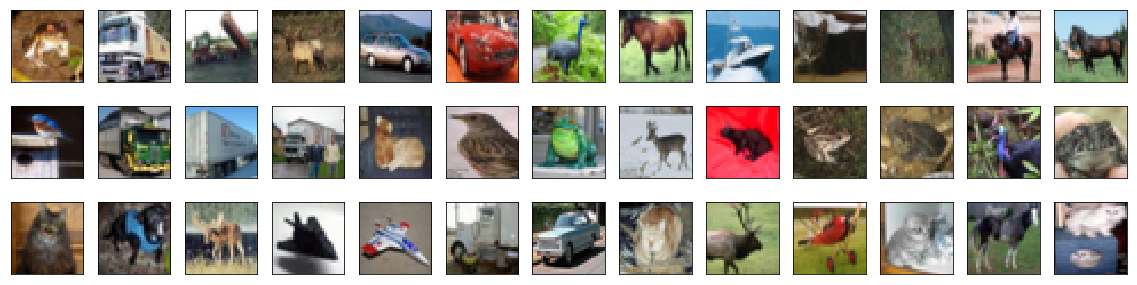

In [15]:
# numpy and vis import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Let's plot some data and see how fucked we are.
# By plot I mean visualize our pictures, which is the same shit but w/e.

# So that's our size or whatever
fig = plt.figure(figsize=(20,5))

# for i in range 39 bc we're gonna sample 39 shit images
for i in range (39):
    
    # the figure will have 3 rows of 13 pictures
    # your guess is as good as mine for the xticks and yticks garbage
    ax = fig.add_subplot(3, 13, i + 1, xticks = [], yticks = [])
    
    # then we show the image np.squeeze? what's that? Who knows bc 
    # it doesn't do shit
    ax.imshow(np.squeeze(x_train[i]))

In [16]:
# We're going to preprocess these again by dividing every pixel by 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
# Now let's make a validation set. I like 80% 20% so I want 20% of 50k as my vali

from keras.utils import np_utils

# Remember to always one hot encode your fucking shit because computers are dumb
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# breaking into training and validation sets:
(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]

# What is our goddamn shape?
print('x_train shape: ', x_train.shape)

#printing the number of training, testing, and vali images:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


x_train shape:  (40000, 32, 32, 3)
40000 train samples
10000 test samples
10000 validation samples


In [19]:
# So first lets ignore all our inhibitions with mlp's and make one
# Even though we know it's a stupid fucking idea.
# good practice or whatever

# imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


In [21]:
# let's define a loss function
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [23]:
# Let's train this bitch for 50 epochs

# import
from keras.callbacks import ModelCheckpoint

#checkpointer
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose = 1)

# history
hist = model.fit(x_train, y_train, batch_size  = 30, epochs = 50,
                validation_data = (x_valid, y_valid), callbacks = [checkpointer],
                verbose = 2, shuffle = True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
Epoch 00000: saving model to MLP.weights.best.hdf5
64s - loss: 2.4189 - acc: 0.2573 - val_loss: 1.9699 - val_acc: 0.2678
Epoch 2/50
Epoch 00001: saving model to MLP.weights.best.hdf5
65s - loss: 1.8844 - acc: 0.3171 - val_loss: 1.8775 - val_acc: 0.3171
Epoch 3/50
Epoch 00002: saving model to MLP.weights.best.hdf5
70s - loss: 1.8434 - acc: 0.3358 - val_loss: 1.7430 - val_acc: 0.3852
Epoch 4/50
Epoch 00003: saving model to MLP.weights.best.hdf5
64s - loss: 1.8178 - acc: 0.3461 - val_loss: 1.8516 - val_acc: 0.3353
Epoch 5/50
Epoch 00004: saving model to MLP.weights.best.hdf5
61s - loss: 1.8049 - acc: 0.3521 - val_loss: 1.8054 - val_acc: 0.3615
Epoch 6/50
Epoch 00005: saving model to MLP.weights.best.hdf5
58s - loss: 1.7984 - acc: 0.3574 - val_loss: 1.7655 - val_acc: 0.3740
Epoch 7/50
Epoch 00006: saving model to MLP.weights.best.hdf5
62s - loss: 1.7952 - acc: 0.3588 - val_loss: 1.7132 - val_acc: 0.3810
Epoch 8/50
Epoch 00007: sa

KeyboardInterrupt: 

In [24]:
# let's load the saved model weights:
model.load_weights('MLP.weights.best.hdf5')

In [27]:
# Let's evaluate the loaded weights:
score = model.evaluate(x_test, y_test, verbose= 0)
print('\n', 'test accuracy: ', score[1])


 test accuracy:  0.362


In [ ]:
# Wow that sucks, let's do another in CNN in the CNN notebook,